# Problem Statement

You have been provided with the dataset that contains the features of the cars along with the price. Based on the given data, you need built a model using Random Forest Regressor to predict the price of the car.

#Importing  libraries



In [1]:
# For mathematical operations
import numpy as np

# For data manipulation
import pandas as pd

# For data visualisation
import matplotlib.pyplot as plt

# For data visualisation
import seaborn as sns

# For data cleaning
import re
 
# For splitting the data and for features selection
from sklearn.model_selection import train_test_split, RandomizedSearchCV

# Accuracy matrics
from sklearn.metrics import r2_score

# For loading the Random Forest regression and Extra Tree Regression algorithm
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor 

# Coverting categorical data into numerical form
from sklearn.preprocessing import LabelEncoder

# For exporting the model
import pickle

# Defining the Datatset
Dataset link: https://drive.google.com/file/d/16d27Jk5jESv0TpRUzzYeiurAvU8exwH6/view?usp=sharing

# Importing the Dataset

In [2]:
df = pd.read_csv('/content/drive/MyDrive/ayush/Devtown/Project-8 CarPrice Dataset/CarPrice_Assignment.csv')

#Exploratory Data Analysis(EDA) - Data Exploration(DE), Data Manupulation(DM), Data Cleaning(DC) and Data Visualization(DV)

In [3]:
# First three rows of dataframe
df.head(3)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0


In [4]:
# Last three rows of dataframe
df.tail(3)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [5]:
# Shape of the dataframe
df.shape

(205, 26)

In [6]:
# Data type of all columns
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [7]:
# Columns names in the Dataframe
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [8]:
# General information of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [9]:
# Statistical information of the dataframe
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [10]:
# Sum of null values in each column
df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [11]:
# Sum of null values in whole dataset
df.isna().sum().sum()

0

In [12]:
# Sum of duplicate values in the dataset
df.duplicated().sum()

0

In [13]:
# First two rows of dataframe
df.head(2)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0


In [14]:
# Dataframe column of Carname
df[['CarName']]

,CarName
0,alfa-romero giulia
1,alfa-romero stelvio
2,alfa-romero Quadrifoglio
3,audi 100 ls
4,audi 100ls
...,...
200,volvo 145e (sw)
201,volvo 144ea
202,volvo 244dl
203,volvo 246


In [15]:
# Unique values in CarName column
df.CarName.unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [16]:
# Total number of unique values in the CarName column
len(df.CarName.unique())

147

* In the CarName column there are 147 unique car names , it is difficult to create the category for all 147 car name.
* We have find a pattern in the CarName column that the first letter gives the name of the company.
* So we are extracting the Company name of the car. 

In [17]:
df.CarName[0]

'alfa-romero giulia'

In [18]:
# Re pattern for extracting the name of the car company
re.sub(' .*', '', df.CarName[0])

'alfa-romero'

* Creating the list that contain the company name of the cars.

In [19]:
#list comprehension
#lis = [brand_name = re.sub(' .*','',df.CarName[i]) for i in range(len(df))]
lis = []
for i in range(len(df)):
  brand_name = re.sub(' .*', '', df.CarName[i])
  lis.append(brand_name)
print(lis)  

['alfa-romero', 'alfa-romero', 'alfa-romero', 'audi', 'audi', 'audi', 'audi', 'audi', 'audi', 'audi', 'bmw', 'bmw', 'bmw', 'bmw', 'bmw', 'bmw', 'bmw', 'bmw', 'chevrolet', 'chevrolet', 'chevrolet', 'dodge', 'dodge', 'dodge', 'dodge', 'dodge', 'dodge', 'dodge', 'dodge', 'dodge', 'honda', 'honda', 'honda', 'honda', 'honda', 'honda', 'honda', 'honda', 'honda', 'honda', 'honda', 'honda', 'honda', 'isuzu', 'isuzu', 'isuzu', 'isuzu', 'jaguar', 'jaguar', 'jaguar', 'maxda', 'maxda', 'mazda', 'mazda', 'mazda', 'mazda', 'mazda', 'mazda', 'mazda', 'mazda', 'mazda', 'mazda', 'mazda', 'mazda', 'mazda', 'mazda', 'mazda', 'buick', 'buick', 'buick', 'buick', 'buick', 'buick', 'buick', 'buick', 'mercury', 'mitsubishi', 'mitsubishi', 'mitsubishi', 'mitsubishi', 'mitsubishi', 'mitsubishi', 'mitsubishi', 'mitsubishi', 'mitsubishi', 'mitsubishi', 'mitsubishi', 'mitsubishi', 'mitsubishi', 'Nissan', 'nissan', 'nissan', 'nissan', 'nissan', 'nissan', 'nissan', 'nissan', 'nissan', 'nissan', 'nissan', 'nissan', '

In [20]:
# Converting the list into the Dataframe
pd.DataFrame(lis)

,0
0,alfa-romero
1,alfa-romero
2,alfa-romero
3,audi
4,audi
...,...
200,volvo
201,volvo
202,volvo
203,volvo


In [21]:
# Assigning the value of lis to CarName column of the Dataframe
df.CarName = pd.DataFrame(lis)

In [22]:
# Total number of unique values in the CarName column
df.CarName.nunique()

28

In [23]:
# Unique values in CarName column
df.CarName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

* We can see that there are come spelling mistakes, some short form of carname.

1.porcschce >> porsche

2.toyouta >> toyouta

3.vokswagen,vw >> volkswagen

4.maxda >> mazda

 So we are converting these values in their proper form.

In [24]:
# Replacing the values
df.CarName.replace(['Nissan','porcshce','toyouta','vokswagen','vw','maxda'],
                   ['nissan','porsche','toyota','volkswagen','volkswagen','mazda'], inplace = True)

In [25]:
# Total number of unique values in the CarName column
df.CarName.nunique()

22

In [26]:
# Unique values in CarName column
df.CarName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [27]:
# Sum of unique values in CarName column
df.CarName.value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: CarName, dtype: int64

* Putting the carname which are having count less than 10 as 'others' because they can creating the dataset imbalance.

In [28]:
arr = df.CarName.value_counts()

def new_cate(data):
  if data in arr[arr<10]:
    return 'others'
  else:
    return data  

df.CarName = df.CarName.apply(new_cate)

In [29]:
# Total number of unique values in the CarName column
df.CarName.nunique()

10

In [30]:
# Sum of Unique values in the CarName column
df.CarName.value_counts()

others        66
toyota        32
nissan        18
mazda         17
honda         13
mitsubishi    13
subaru        12
volkswagen    12
peugeot       11
volvo         11
Name: CarName, dtype: int64

In [31]:
# Using replace function for assigning the category of carname a numerical value
df.CarName.replace(df.CarName.unique(),
                   [i for i in range(len(df.CarName.unique()))], inplace = True)

In [32]:
# Sum of Unique values in the CarName column
df.CarName.value_counts()

0    66
7    32
4    18
2    17
1    13
3    13
6    12
8    12
5    11
9    11
Name: CarName, dtype: int64

Substituted in CarName column

others -> 0        

honda -> 1                 

mazda -> 2                 

mitsubishi -> 3

nissan -> 4

peugeot -> 5       

subaru -> 6        

toyota -> 7

volkswagen -> 8    

volvo ->  9       

In [33]:
# As car_ID do not have any effect of price we are dropping it
df.drop('car_ID', axis = 1, inplace = True)

In [34]:
# Total number of unique values in the symboling column
df.symboling.nunique()

6

In [35]:
# Sum of Unique values in the symboling column
df.symboling.value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

In [36]:
# Total number of unique values in the fueltype column
df.fueltype.nunique()

2

In [37]:
# Sum of Unique values in the fueltype column
df.fueltype.value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

In [38]:
# Creating object for LabelEncoder
enc = LabelEncoder()

In [39]:
# Applying label encoder
df.fueltype = enc.fit_transform(df.fueltype)

In [40]:
# Sum of Unique values in the fueltype column
df.fueltype.value_counts()

1    185
0     20
Name: fueltype, dtype: int64

Substituted for fueltype

gas -> 1

diesel -> 0

In [41]:
# Unique values in aspiration column
df.aspiration.unique()

array(['std', 'turbo'], dtype=object)

In [42]:
# Sum of unique value in aspiration column
df.aspiration.value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [43]:
# Applying label encoder
df.aspiration = enc.fit_transform(df.aspiration)

In [44]:
# Sum of unique value in aspiration column
df.aspiration.value_counts()

0    168
1     37
Name: aspiration, dtype: int64

Substituted for aspiration column

std -> 0

turbo -> 1

In [45]:
# Unique values in doornumber column
df.doornumber.unique()

array(['two', 'four'], dtype=object)

In [46]:
# Sum of unique value in doornumber column
df.doornumber.value_counts()

four    115
two      90
Name: doornumber, dtype: int64

In [47]:
# Replacing four with 4 and two with 2 
df.doornumber.replace(df.doornumber.unique(), [2, 4], inplace = True)

In [48]:
# Sum of unique value in doornumber column
df.doornumber.value_counts()

4    115
2     90
Name: doornumber, dtype: int64

In [49]:
# Unique values in carbody column
df.carbody.unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [50]:
# Sum of unique value in carbody column
df.carbody.value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

In [51]:
# Applying label encoder
df.carbody = enc.fit_transform(df.carbody)

In [52]:
# Sum of unique value in carbody column
df.carbody.value_counts()

3    96
2    70
4    25
1     8
0     6
Name: carbody, dtype: int64

Substituted for carbody column


convertible -> 0

hardtop -> 1

hatchback -> 2

sedan -> 3

wagon -> 4


In [53]:
# Unique values in drivewheel column
df.drivewheel.unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [54]:
# Sum of unique value in drivewheel column
df.drivewheel.value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

In [55]:
# Replacing 
df.drivewheel.replace(df.drivewheel.unique(), [0, 1, 2], inplace = True)

In [56]:
# Sum of unique value in drivewheel column
df.drivewheel.value_counts()

1    120
0     76
2      9
Name: drivewheel, dtype: int64

Substituted for drivewheel column

rwd -> 0

fwd -> 1

4wd -> 2

In [57]:
# Sum of unique value in enginelocation column
df.enginelocation.value_counts()

front    202
rear       3
Name: enginelocation, dtype: int64

In [58]:
# Replacing
df.enginelocation.replace(df.enginelocation.unique(), [0, 1], inplace = True)

In [59]:
# Sum of unique value in enginelocation column
df.enginelocation.value_counts()

0    202
1      3
Name: enginelocation, dtype: int64

Substituted for enginelocation column

front -> 0

rear -> 1

In [60]:
# Columns in the dataframe
df.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [61]:
# Unique values in enginetype column
df.enginetype.unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [62]:
# Sum of unique value in enginetype column
df.enginetype.value_counts()  

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

In [63]:
# Applying label encoder
df.enginetype = enc.fit_transform(df.enginetype)

In [64]:
# Sum of unique value in enginetype column
df.enginetype.value_counts()

3    148
4     15
5     13
0     12
2     12
6      4
1      1
Name: enginetype, dtype: int64

 Substituted for enginetype

dohc -> 0

dohcv -> 1

l -> 2

dohcv -> 3

ohcf -> 4

ohcv -> 5

rotor -> 6

In [65]:
# Unique values in cylindernumber column
df.cylindernumber.unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [66]:
# Sum of unique value in cylindernumber column
df.cylindernumber.value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64

In [67]:
# Replacing
df.cylindernumber.replace(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],[4, 6, 5, 3, 12, 2, 8], inplace = True)

Substituted for cylindernumber column

four -> 4

six -> 6

five -> 5

eight -> 8

two -> 2

three -> 3

twelve -> 12

In [68]:
# Unique values in fuelsystem column
df.fuelsystem.unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

In [69]:
# Sum of unique value in fuelsystem column
df.fuelsystem.value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64

In [70]:
 # Applying Labelencoder
df.fuelsystem = enc.fit_transform(df.fuelsystem)

In [71]:
# Sum of unique value in fuelsystem column
df.fuelsystem.value_counts()

5    94
1    66
3    20
0    11
6     9
2     3
4     1
7     1
Name: fuelsystem, dtype: int64

Substituted for fuelsystem culumn

1bbl -> 0

2bbl -> 1

4bbl -> 2

idi -> 3

mfi -> 4

mpfi -> 5

spdi -> 6

spfi -> 7

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    int64  
 2   fueltype          205 non-null    int64  
 3   aspiration        205 non-null    int64  
 4   doornumber        205 non-null    int64  
 5   carbody           205 non-null    int64  
 6   drivewheel        205 non-null    int64  
 7   enginelocation    205 non-null    int64  
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    int64  
 14  cylindernumber    205 non-null    int64  
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    int64  
 1

# Obseravtions:

1. Data Strength: 205
2. No. of random variables: 26
3. None of the columns contained Null values
4. Columns - car_ID, symboling, wheelbase, carlength, carwidth, carheight, curbweight, enginesize, boreratio, stroke, compressionratio, horsepower, peakrpm, citympg, highwaympg and price were having numerical value.
5. Columns - CarName, fueltype, aspiration, doornumber, carbody, drivewheel, enginelocation, enginetype, cylindernumber and fuelsystem were having categorical value

In [73]:
# Finding the correlation of columns with each other
df.corr()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1.000000,-0.252842,0.194311,-0.059866,-0.664073,-0.596135,0.041671,0.212471,-0.531954,-0.357612,...,-0.105790,0.091163,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
CarName,-0.252842,1.000000,-0.138434,0.020034,0.226678,0.179029,-0.005379,-0.133909,0.125722,0.084858,...,-0.171060,0.077271,0.137673,-0.153980,0.156484,-0.196466,-0.241545,0.134520,0.100684,-0.260668
fueltype,0.194311,-0.138434,1.000000,-0.401397,-0.191491,-0.147853,0.132257,0.040070,-0.308346,-0.212679,...,-0.069594,0.041529,-0.054451,-0.241829,-0.984356,0.163926,0.476883,-0.255963,-0.191392,-0.105679
aspiration,-0.059866,0.020034,-0.401397,1.000000,0.031792,0.063028,-0.066465,-0.057191,0.257611,0.234539,...,0.108217,0.288086,0.212614,0.222982,0.295541,0.241685,-0.183383,-0.202362,-0.254416,0.177926
doornumber,-0.664073,0.226678,-0.191491,0.031792,1.000000,0.680358,0.098954,-0.137757,0.447357,0.398568,...,0.020742,-0.015519,0.119258,-0.011082,0.177888,-0.126947,-0.247668,-0.012417,-0.036330,0.031835
carbody,-0.596135,0.179029,-0.147853,0.063028,0.680358,1.000000,0.155745,-0.277009,0.401362,0.334433,...,-0.073352,-0.065079,0.010549,-0.015325,0.136243,-0.153928,-0.109643,0.031697,-0.007170,-0.083976
drivewheel,0.041671,-0.005379,0.132257,-0.066465,0.098954,0.155745,1.000000,-0.147865,-0.459745,-0.485649,...,-0.524307,-0.424686,-0.481827,-0.071591,-0.127479,-0.518686,0.039417,0.449581,0.452220,-0.577992
enginelocation,0.212471,-0.133909,0.040070,-0.057191,-0.137757,-0.277009,-0.147865,1.000000,-0.187790,-0.050989,...,0.196826,0.105971,0.185042,-0.138455,-0.019762,0.317839,0.198461,-0.153487,-0.102026,0.324973
wheelbase,-0.531954,0.125722,-0.308346,0.257611,0.447357,0.401362,-0.459745,-0.187790,1.000000,0.874587,...,0.569329,0.384601,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,-0.357612,0.084858,-0.212679,0.234539,0.398568,0.334433,-0.485649,-0.050989,0.874587,1.000000,...,0.683360,0.557810,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920


<Axes: >

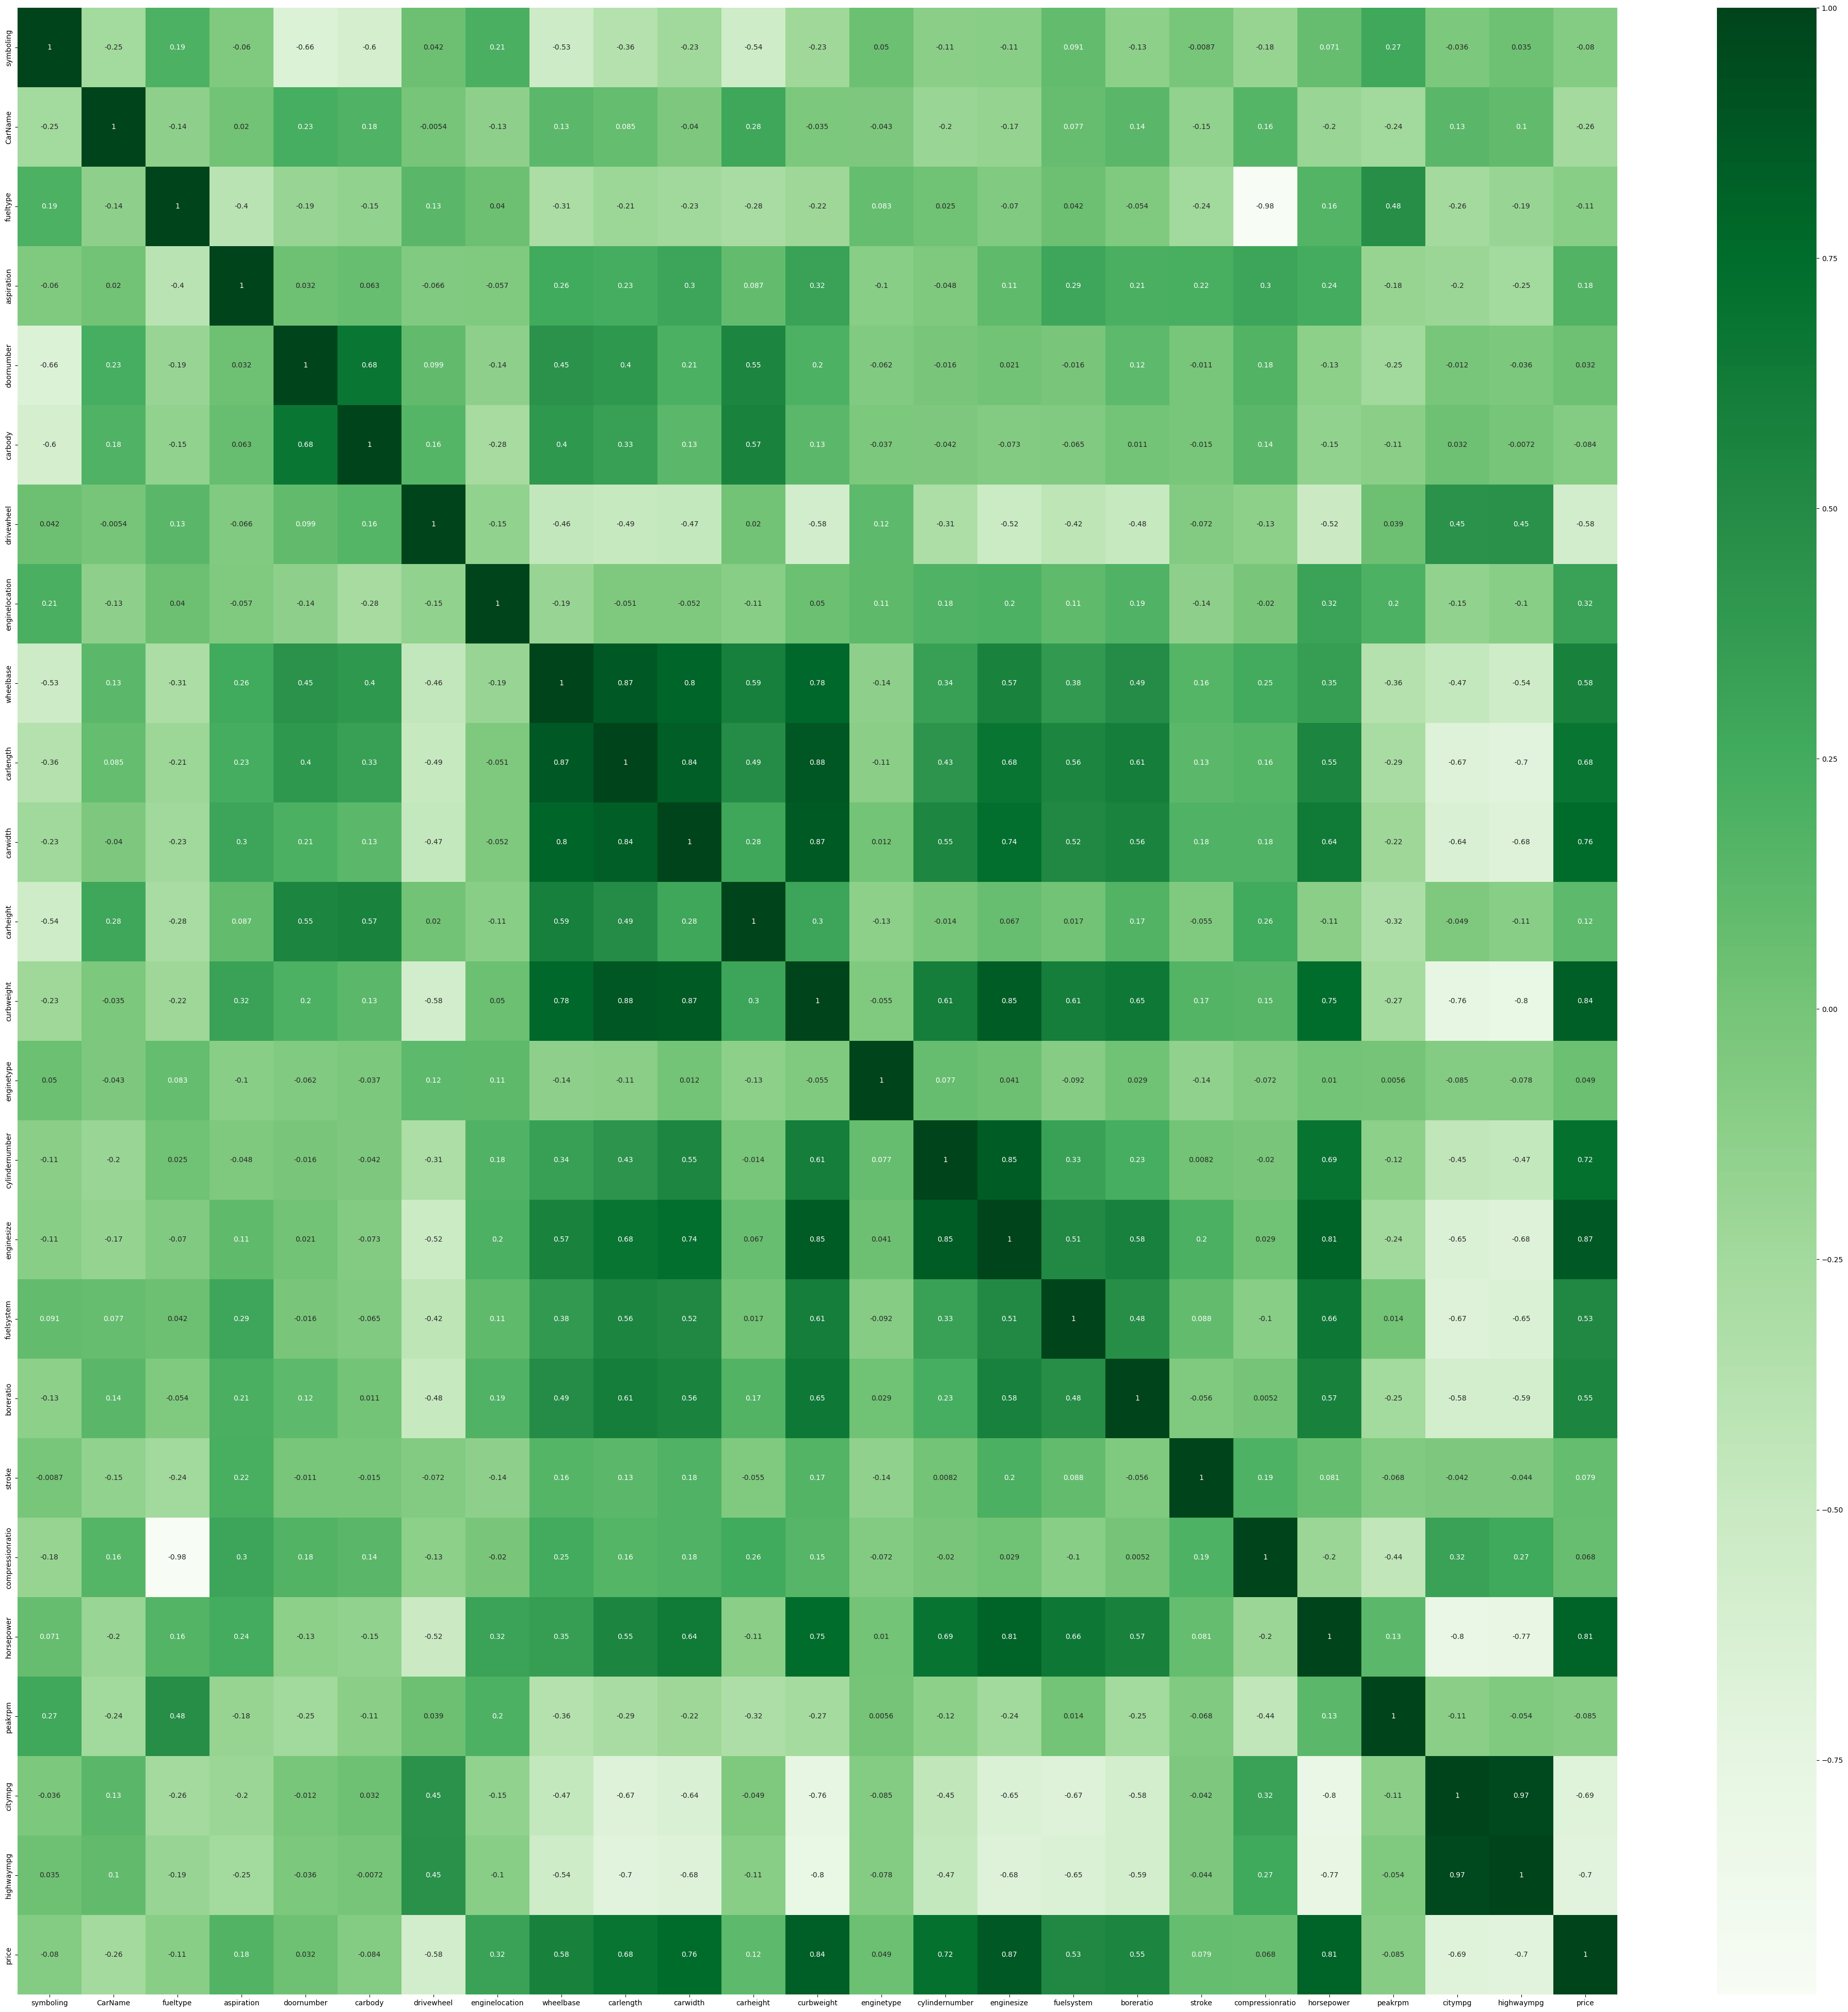

In [74]:
# Plotting the correlation using the heatmap
plt.figure(figsize = (50, 50))
sns.heatmap(df.corr(), annot = True, cmap = 'Greens')

# Selecting the features and target

In [75]:
X = df.drop('price', axis = 1) # Features
y = df.price # Target

In [76]:
X

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,3,0,1,0,2,0,0,0,88.6,168.8,...,4,130,5,3.47,2.68,9.0,111,5000,21,27
1,3,0,1,0,2,0,0,0,88.6,168.8,...,4,130,5,3.47,2.68,9.0,111,5000,21,27
2,1,0,1,0,2,2,0,0,94.5,171.2,...,6,152,5,2.68,3.47,9.0,154,5000,19,26
3,2,0,1,0,4,3,1,0,99.8,176.6,...,4,109,5,3.19,3.40,10.0,102,5500,24,30
4,2,0,1,0,4,3,2,0,99.4,176.6,...,5,136,5,3.19,3.40,8.0,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,9,1,0,4,3,0,0,109.1,188.8,...,4,141,5,3.78,3.15,9.5,114,5400,23,28
201,-1,9,1,1,4,3,0,0,109.1,188.8,...,4,141,5,3.78,3.15,8.7,160,5300,19,25
202,-1,9,1,0,4,3,0,0,109.1,188.8,...,6,173,5,3.58,2.87,8.8,134,5500,18,23
203,-1,9,0,1,4,3,0,0,109.1,188.8,...,6,145,3,3.01,3.40,23.0,106,4800,26,27


In [77]:
y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

# Featur Selection (IMPORTANT FEATURES)

* As we are having a lot of features, we are using ExtraTreesRegressor for Feature Selection to take only most important features for making accurate prediction.



In [78]:
model = ExtraTreesRegressor()

In [79]:
model.fit(X, y)

ExtraTreesRegressor()

In [80]:
# Showing values for importanat features
model.feature_importances_

array([0.00271266, 0.03340551, 0.00238845, 0.0090289 , 0.00212215,
       0.0044214 , 0.05386915, 0.02264581, 0.01902915, 0.01969027,
       0.06042088, 0.0053263 , 0.16554914, 0.00320266, 0.13189949,
       0.22038791, 0.02401761, 0.01984624, 0.00572378, 0.00339936,
       0.06950922, 0.01509396, 0.05067465, 0.05563535])

In [81]:
imp_features = pd.Series(model.feature_importances_, index = X.columns)

In [82]:
imp_features

symboling           0.002713
CarName             0.033406
fueltype            0.002388
aspiration          0.009029
doornumber          0.002122
carbody             0.004421
drivewheel          0.053869
enginelocation      0.022646
wheelbase           0.019029
carlength           0.019690
carwidth            0.060421
carheight           0.005326
curbweight          0.165549
enginetype          0.003203
cylindernumber      0.131899
enginesize          0.220388
fuelsystem          0.024018
boreratio           0.019846
stroke              0.005724
compressionratio    0.003399
horsepower          0.069509
peakrpm             0.015094
citympg             0.050675
highwaympg          0.055635
dtype: float64

Text(0.5, 1.0, 'Feature Importance Graph')

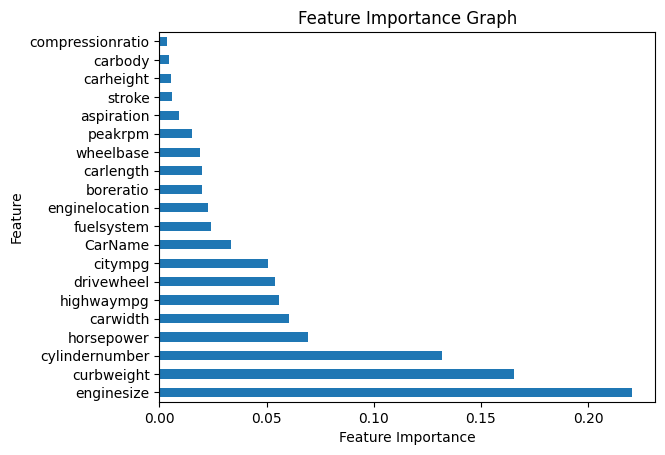

In [83]:
#Plotting Top 20 features w.r.t. the Target
imp_features.nlargest(20).plot(kind='barh')
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance Graph")

In [84]:
# Top 10 features w.r.t. the Target
imp_features.nlargest(10)

enginesize        0.220388
curbweight        0.165549
cylindernumber    0.131899
horsepower        0.069509
carwidth          0.060421
highwaympg        0.055635
drivewheel        0.053869
citympg           0.050675
CarName           0.033406
fuelsystem        0.024018
dtype: float64

In [85]:
# Storing top 10 features into var variable
var = imp_features.nlargest(10).index

In [86]:
# Creating the list of var
list(var)

['enginesize',
 'curbweight',
 'cylindernumber',
 'horsepower',
 'carwidth',
 'highwaympg',
 'drivewheel',
 'citympg',
 'CarName',
 'fuelsystem']

In [87]:
# Top 10 features from X
X[list(var)]

,enginesize,curbweight,cylindernumber,horsepower,carwidth,highwaympg,drivewheel,citympg,CarName,fuelsystem
0,130,2548,4,111,64.1,27,0,21,0,5
1,130,2548,4,111,64.1,27,0,21,0,5
2,152,2823,6,154,65.5,26,0,19,0,5
3,109,2337,4,102,66.2,30,1,24,0,5
4,136,2824,5,115,66.4,22,2,18,0,5
...,...,...,...,...,...,...,...,...,...,...
200,141,2952,4,114,68.9,28,0,23,9,5
201,141,3049,4,160,68.8,25,0,19,9,5
202,173,3012,6,134,68.9,23,0,18,9,5
203,145,3217,6,106,68.9,27,0,26,9,3


In [88]:
# New features dataframe
X_new = X[list(var)] 

In [89]:
X_new

,enginesize,curbweight,cylindernumber,horsepower,carwidth,highwaympg,drivewheel,citympg,CarName,fuelsystem
0,130,2548,4,111,64.1,27,0,21,0,5
1,130,2548,4,111,64.1,27,0,21,0,5
2,152,2823,6,154,65.5,26,0,19,0,5
3,109,2337,4,102,66.2,30,1,24,0,5
4,136,2824,5,115,66.4,22,2,18,0,5
...,...,...,...,...,...,...,...,...,...,...
200,141,2952,4,114,68.9,28,0,23,9,5
201,141,3049,4,160,68.8,25,0,19,9,5
202,173,3012,6,134,68.9,23,0,18,9,5
203,145,3217,6,106,68.9,27,0,26,9,3


# MODEL SELECTION

* Defining the model/algorithm

In [90]:
model = RandomForestRegressor()

# Hyper Parameter Tuning

* Performing the Hyper Parameter Tuning to get the best parametric value for the model using RandomizedSearchCV

In [91]:
# No. of trees in a random forest
n_estimators = [i for i in range(100, 1201, 100)]

# No. of features to consider at every split
max_features = ['sqrt', 'auto']

# Maximum no. of levels in a Tree
max_depth = [int(i) for i in np.linspace(start=5, stop=30, num=6)]

# Minimum no. of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]

# Mimimum no. of samples required at each leaf node
min_samples_leaf = [1, 2, 7, 5, 10]

In [92]:
random_grid = {
    'n_estimators': n_estimators,
    
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
}

In [93]:
random_grid

{'n_estimators': [100,
  200,
  300,
  400,
  500,
  600,
  700,
  800,
  900,
  1000,
  1100,
  1200],
 'max_depth': [5, 10, 15, 20, 25, 30],
 'min_samples_split': [2, 5, 10, 15, 100],
 'min_samples_leaf': [1, 2, 7, 5, 10]}

In [94]:
rf_random = RandomizedSearchCV(estimator = model, # Allocating the model
                               param_distributions = random_grid, # Assigning the Hyper Parameters
                               n_jobs = 1, # No. of times to run
                               random_state = 42, 
                               verbose = 3, # To show information at each run
                               cv = 5) # cross validation fold = 5

# Splitting the dataset into training and testing sets

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.15, random_state=42)

In [96]:
# Length of X_train
len(X_train)

174

In [97]:
# Length of X_test
len(X_test)

31

# Training the model

In [98]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END max_depth=20, min_samples_leaf=5, min_samples_split=15, n_estimators=1100;, score=0.911 total time=   4.3s
[CV 2/5] END max_depth=20, min_samples_leaf=5, min_samples_split=15, n_estimators=1100;, score=0.886 total time=   3.9s
[CV 3/5] END max_depth=20, min_samples_leaf=5, min_samples_split=15, n_estimators=1100;, score=0.910 total time=   3.3s
[CV 4/5] END max_depth=20, min_samples_leaf=5, min_samples_split=15, n_estimators=1100;, score=0.933 total time=   5.4s
[CV 5/5] END max_depth=20, min_samples_leaf=5, min_samples_split=15, n_estimators=1100;, score=0.863 total time=   4.6s
[CV 1/5] END max_depth=25, min_samples_leaf=10, min_samples_split=5, n_estimators=800;, score=0.791 total time=   2.8s
[CV 2/5] END max_depth=25, min_samples_leaf=10, min_samples_split=5, n_estimators=800;, score=0.850 total time=   3.1s
[CV 3/5] END max_depth=25, min_samples_leaf=10, min_samples_split=5, n_estimators=800;, score=0.857 t

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'min_samples_leaf': [1, 2, 7, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, verbose=3)

In [99]:
# Give the best parameters values
rf_random.best_params_

{'n_estimators': 1100,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_depth': 25}

# Testing phase

In [100]:
# Predicting
y_pred = rf_random.predict(X_test)

In [101]:
# Creating dataframe
final_df = pd.DataFrame({'Actual value': y_test,
                         'Predicted_value':y_pred})

In [102]:
final_df

,Actual value,Predicted_value
15,30760.000,34187.910921
9,17859.167,18144.038873
100,9549.000,9037.498204
132,11850.000,13857.939945
68,28248.000,32179.789487
95,7799.000,7085.552215
159,7788.000,7919.856419
162,9258.000,7813.915444
147,10198.000,10549.899038
182,7775.000,8033.890581


# Performance

In [103]:
# Checking the accuracy of the model
r2_score(y_test,y_pred)

0.9214112002280656

* Accuracy = 92%

In [104]:
# Checking it for decision tree
from sklearn.tree import DecisionTreeRegressor

dt_model =  DecisionTreeRegressor()
dt_model.fit(X_train,y_train)
dt_pred = dt_model.predict(X_test)
r2_score(y_test,dt_pred)

0.9395308410837184

In [105]:
# Checking it for linear regression
from sklearn.linear_model import LinearRegression

dt_model =  LinearRegression()
dt_model.fit(X_train,y_train)
lr_pred = dt_model.predict(X_test)
r2_score(y_test,lr_pred)

0.852724604152209

 Accuracy for-

* RF - 0.9209155870280079
* DC - 0.9293544151387076
* LR - 0.852724604152209


# Exporting the model

In [106]:
with open('rf_random.pkl', 'wb') as files:
  pickle.dump(rf_random, files)